# Modelação de Sistemas Térmicos Usando Modelos de Primeira Ordem
O objetivo deste guião laboratorial é realizar a modelação dos sistemas térmicos $1$ e $2$ (`S1` e `S2`) do **SERT** usando modelos de primeira ordem com e sem tempo de atraso.  

Os modelos do processo são determinados para uma entrada em degrau correspondente a $50$% do sinal de controlo aplicado ao sistema correspondente, `T1` ou `T2`. O período de amostragem é de $1$ segundo.

## 1. Introdução
Para o controlo de temperatura, não é necessário utilizar um modelo detalhado do processo. Uma lógica de controlo simples pode ser suficiente para operar o sistema. No entanto, compreender e explicar o comportamento resultante desse controlo é altamente desejável, especialmente ao tentar projetar um algoritmo mais eficaz ou inteligente. Neste trabalho, o objetivo é derivar modelos de primeira ordem para descrever a dinâmica térmica do sistema, com base em sua resposta a um degrau. Isso permitirá obter um modelo matemático que descreva o sistema, sem a necessidade de considerar os aspectos físicos subjacentes.

## 2. Respostas ao Degrau dos Sistemas Térmicos
Nesta secção, os dados de temperatura dos sistemas `S1` e `S2` são obtidos e visualizados. 

### 2.1 Sistema S1
Para a aquisição da temperatura do sistema `S1` configure a entrada analógica para o pino `A0` (sensor `S1`) e a saída de PWM no pino 10 (transístor `T1`). Para isso, utilize o Jupyter Notebook `Aquisicao_dados_S1_S2.ipynb` disponibilizado na página do Moodle da UC.


Apresente a curva de resposta da temperatura do sistema térmico `S1` para uma entrada em degrau de amplitude de $50$% do *duty cycle* (PWM do transístor `T1` a $50$%). Para isso, carregue o ficheiro de dados gravado correspondente, por exemplo, `dados_S1.txt` para o ficheiro com os dados de `S1`. 
Teça alguns comentários aos valores e forma dos dados experimentais obtidos.

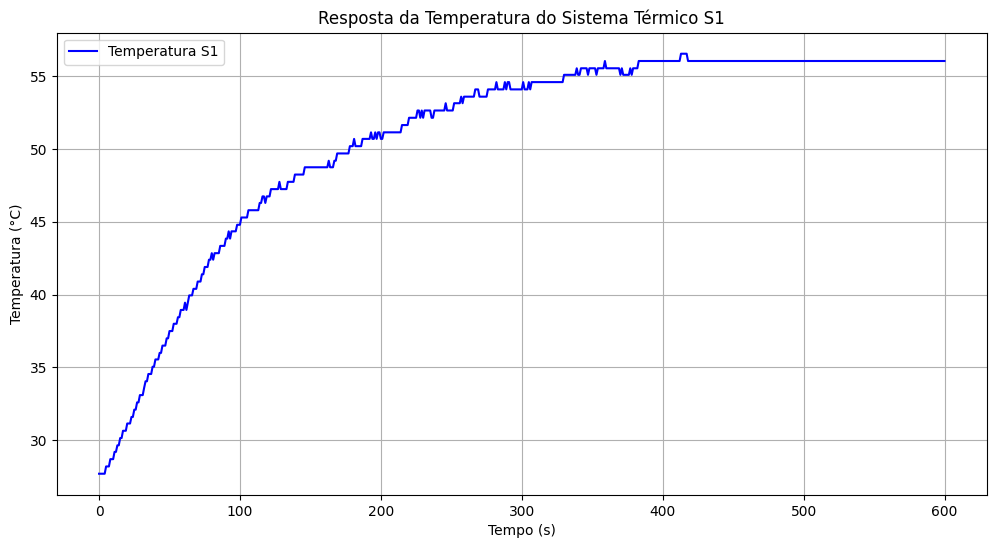

In [43]:
# Coloque o código/comentários AQUI

import numpy as np
import matplotlib.pyplot as plt

# Carregar os dados do arquivo para análise
data = np.loadtxt('dados_S1.txt', delimiter=',', skiprows=1)

# Extrair os dados de tempo, entrada PWM e temperatura/y
tempo_S1 = data[:, 0]
pwm_S1 = data[:, 1]
temperatura_S1 = data[:, 2]

# Plotar a resposta da temperatura em função do tempo
plt.figure(figsize=(12, 6))
plt.plot(tempo_S1, temperatura_S1, '-',label='Temperatura S1', color='b')
plt.title('Resposta da Temperatura do Sistema Térmico S1')
plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (°C)')
plt.grid()
plt.legend()
plt.show()

#O resultado obtido apresenta efetivamente uma curva típica de um sistema térmico. Começa com um aumento da temperatura a partir de 27.6º(Temperatura ambiente)
# até estabilizar nos 50.6º sensivelmente no segundo 385. 

### 2.2 Sistema S2
Para a aquisição da temperatura do sistema `S2` configure a entrada analógica para o pino `A1` (sensor `S2`) e a saída de PWM no pino 9 (transístor `T2`). Para isso, utilize o Jupyter Notebook `Aquisicao_dados_S1_S2.ipynb` disponibilizado na página do Moodle da UC.

Apresente a curva de resposta da temperatura do sistema térmico `S2` para uma entrada em degrau de amplitude de $50$% do *duty cycle* (PWM do transístor `T2` a $50$%).  Para isso, carregue o ficheiro de dados gravado correspondente, por exemplo, `dados_S2.txt` para o ficheiro com os dados de `S2`. 
Teça alguns comentários aos valores e forma dos dados experimentais obtidos.

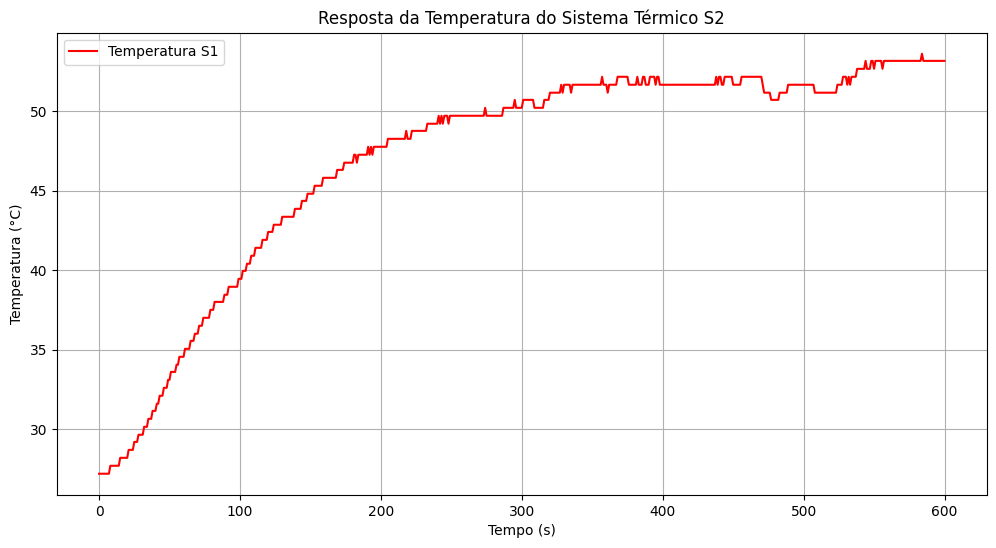

O primeiro valor da temperatura (temperatura ambiente no momento do início do experimento ) é 27.20 °C


In [44]:
# Coloque o código/comentários AQUI

import numpy as np
import matplotlib.pyplot as plt

# Carregar os dados do arquivo para análise
data = np.loadtxt('dados_S2.txt', delimiter=',', skiprows=1)

# Extrair os dados de tempo, entrada PWM e temperatura/y
tempo_S2 = data[:, 0]
pwm_S2 = data[:, 1]
temperatura_S2 = data[:, 2]

# Plotar a resposta da temperatura em função do tempo
plt.figure(figsize=(12, 6))
plt.plot(tempo_S2, temperatura_S2, '-',label='Temperatura S1', color='r')
plt.title('Resposta da Temperatura do Sistema Térmico S2')
plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (°C)')
plt.grid()
plt.legend()
plt.show()


# Primeiro valor da temperatura
S2_c1 = temperatura_S2[0]
print(f'O primeiro valor da temperatura (temperatura ambiente no momento do início do experimento ) é {S2_c1:.2f} °C')

#O resultado obtido apresenta efetivamente uma curva típica de um sistema térmico. Começa com um aumento da temperatura a partir de 27.1º(Temperatura Ambiente)
# até estabilizar nos 53.1º sensivelmente no segundo 549. Este momento acontece mais retardado que o sistema devido a fatores externos que impediram uma captura mais fiel dos dados.



## 3.	Modelos Empíricos dos Sistemas
Observando as respostas ao degrau, verifica-se que podem surgir alguns problemas na estimativa dos parâmetros do modelo por causa do ruído no sinal e devido ao *drift* nos dados. O efeito do ruído pode ser minimizado por uma filtragem passa-baixo, ou suavização, dos dados. O *drift* pode ser devido a inúmeros efeitos externos, como por exemplo, variações na temperatura ambiente, variações de amplitude da tensão, correntes de ar (convecção) e erros no sensor.

Para uma análise inicial dos resultados utiliza-se o índice de desempenho $SSE$ (*Sum of Squared Errors*):

$$ SSE = \sum_{i=1}^{N}(\hat{y}_i-yi)^2 \tag{1} $$

Este índice dá-nos uma indicação mais exata da proximidade entre o modelo e os dados de uma dada experiência. $N$ é o número total de amostras da resposta do processo, $\hat{y}_i$ os dados da resposta do modelo e $y_i$ os dados da resposta do processo. 

### 3.1	Sistema de Primeira Ordem – S1
A curva de resposta de temperatura do sistema `S1` indica que a dinâmica térmica do sistema pode ser aproximada por uma função de transferência de primeira ordem:

$$ G(s)=\frac{Y(s)}{U(s)}=\frac{K}{\tau s+1} \tag{2} 
$$

onde $K$ é o ganho DC do sistema e $\tau$ a constante de tempo.

Considere o exemplo da curva de temperatura representada na figura seguinte. A partir da curva, obtenha a temperatura ambiente (temperatura inicial do sistema) $T_0$ e a temperatura estabilizada do sistema $T_{ss}$. Considerando que a entrada é igual a $50$% do valor máximo aplicado ao atuador, e a saída é $\Delta T$, determine o ganho DC,  $K$, do sistema aproximado. Calcule a constante de tempo $\tau$ como o tempo necessário para a resposta do sistema alcançar $63.2$% da sua variação total. 

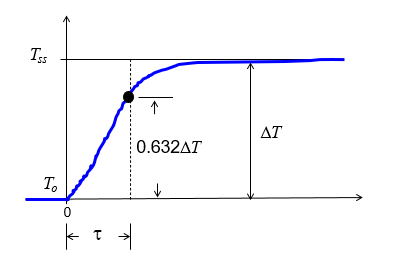

Calcule e apresente os valores obtidos a partir da curva de temperatura de `S1` para a definição do modelo de primeira ordem, ou seja, forneça os valores de $T_0$, $T_{ss}$, $\Delta_T$, $K$, $\tau$ e $SSE$.

In [45]:
# Coloque o código AQUI
from scipy.interpolate import interp1d

# Para se obter T0, basta pegar no primeiro valor dos dados experimentais obtidos para S1.
T0_S1 = temperatura_S1[0]
print(f"Temperatura inicial = {T0_S1} °C")
# Para se obter Tss, basta pegar no último valor dos dados experimentais obtidos para S1, já que temos a certeza que o mesmo pertence á temperatura estabilizada.
Tss_S1 = temperatura_S1[len(temperatura_S1)-1]
print(f"Temperatura estabilizada = {Tss_S1} °C")
# Para se obter ΔT, basta subtrair a temperatura estabilizada pela temperatura inicial.
ΔT_S1 = Tss_S1 - T0_S1
print(f"ΔT_S1 = {ΔT_S1}")
# Para se obter K, usamos ΔT/Δu (diferença entre a temperatura estabilizada e a temperatura inicial dividido por  variação do sinal de entrada). 
Δu_S1 = 50
K_S1 = ΔT_S1/Δu_S1
print(f"K = {K_S1}")
# Para se obter τ
y63 = ΔT_S1*0.632 + T0_S1
print("T_63% = ", y63)
# Interpolação para se obter o valor de τ (tau)
f = interp1d(temperatura_S1, tempo_S1)
τ_S1 = f(y63)
print(f"τ = {τ_S1} s")

# SSE (Sum of Squared Errors) - Soma dos Erros ao Quadrado 
# Para se obter o SSE é necessario ter um modelo que represente a resposta do sistema, para que possamos comparar com os dados experimentais obtidos.
# o nosso modelo: y(t) = T0 + K*A*(1 - exp(-t/τ))

def modelo_primeira_ordem(tempo_S1, T0_S1, KA_S1, τ):
    return T0_S1 + KA_S1*(1-np.exp(-τ*tempo_S1))
# vamos obter os valores de y para o modelo
y_modelo_S1 = modelo_primeira_ordem(tempo_S1, T0_S1, K_S1*Δu_S1, 1/τ_S1)
# Finalmente, calculamos o SSE que representa o erro quadrático entre o modelo e os dados experimentais.
SSE_S1 = np.sum((y_modelo_S1 - temperatura_S1)**2)
print(f"SSE = {SSE_S1}")

#SSE = 228,87: O SSE (Soma dos Erros ao Quadrado) representa uma métrica de avaliação do modelo de primeira ordem à resposta real do sistema.
#Um valor menor de SSE indica um ajuste melhor entre o modelo teórico e os dados experimentais. 
#O valor de 228,87 sugere que o modelo de primeira ordem pode não estar ajustando de maneira perfeita, mas ainda fornece uma aproximação razoável.


Temperatura inicial = 27.7 °C
Temperatura estabilizada = 56.05 °C
ΔT_S1 = 28.349999999999998
K = 0.567
T_63% =  45.6172
τ = 105.6344 s
SSE = 228.86671198676245


Com base nos parâmetros identificados, apresente a função de transferência do modelo estimado do sistema térmico, $G(s)$.



In [46]:
# Coloque o código AQUI

def G_s (K_S1, tempo_S1, τ):
    return (K_S1/((τ*tempo_S1)+1))

Ganho = G_s(K_S1, tempo_S1, τ_S1)

print(Ganho)


[5.67000000e-01 5.31723346e-03 2.67114150e-03 1.78356179e-03
 1.33872412e-03 1.07148526e-03 8.93185702e-04 7.65760072e-04
 6.70153197e-04 5.95769970e-04 5.36249319e-04 4.87541299e-04
 4.46944883e-04 4.12589525e-04 3.83138759e-04 3.57612285e-04
 3.35274734e-04 3.15563667e-04 2.98041567e-04 2.82362981e-04
 2.68251511e-04 2.55483385e-04 2.43875499e-04 2.33276579e-04
 2.23560554e-04 2.14621517e-04 2.06369847e-04 1.98729199e-04
 1.91634126e-04 1.85028209e-04 1.78862548e-04 1.73094550e-04
 1.67686945e-04 1.62606979e-04 1.57825752e-04 1.53317664e-04
 1.49059960e-04 1.45032343e-04 1.41216653e-04 1.37596592e-04
 1.34157491e-04 1.30886112e-04 1.27770479e-04 1.24799726e-04
 1.21963979e-04 1.19254238e-04 1.16662288e-04 1.14180612e-04
 1.11802318e-04 1.09521079e-04 1.07331072e-04 1.05226932e-04
 1.03203705e-04 1.01256813e-04 9.93820156e-05 9.75753809e-05
 9.58332578e-05 9.41522518e-05 9.25292020e-05 9.09611621e-05
 8.94453818e-05 8.79792916e-05 8.65604874e-05 8.51867179e-05
 8.38558723e-05 8.256596

Para se obter uma melhor perceção de quão bem o modelo derivado se adapta aos dados da curva de temperatura, esboce no mesmo gráfico as duas curvas de temperatura: a do modelo e a do sistema térmico. Teça alguns comentários face à aproximação obtida.

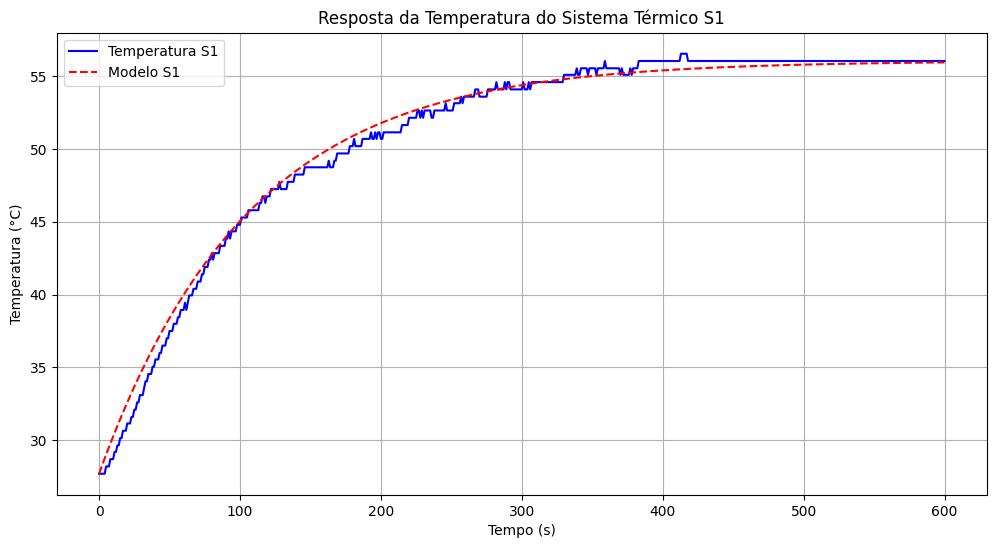

In [47]:
# Coloque o código/comentários AQUI

plt.figure(figsize=(12, 6))
plt.plot(tempo_S1, temperatura_S1, '-',label='Temperatura S1', color='b')
plt.plot(tempo_S1, y_modelo_S1, '--',label='Modelo S1', color='r')
plt.title('Resposta da Temperatura do Sistema Térmico S1')
plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (°C)')
plt.grid()
plt.legend()
plt.show()

#Como podemos ver pelo gráfico gerado, é possível verificar que o modelo gerado segue geralmente a resposta do sistema térmicos com momentos
#Como o intervalo entre os 150 e os 210 segundos que as duas linhas se distanciam, contribuindo assim para o valor de SSE longe de 0 como seria ideal 

### 3.2	Sistema de Primeira Ordem com Atraso – S2
A curva de resposta de temperatura do sistema `S2` indica que a dinâmica térmica do sistema pode ser aproximada por uma função de transferência de primeira ordem com um tempo de atraso:

$$ G(s)=\frac{Y(s)}{U(s)}=\frac{Ke^{-\tau_Ds}}{\tau s+1} \tag{3} 
$$

onde $K$ é o ganho DC do sistema, $\tau$ a constante de tempo e $\tau_D$ o tempo de atraso.

Considere o exemplo da curva de temperatura representada na figura seguinte. A partir da curva, obtenha a temperatura ambiente (temperatura inicial do sistema) $T_0$ e a temperatura estabilizada do sistema $T_{ss}$. Considerando que a entrada é igual a $50$% do valor máximo aplicado ao atuador, e a saída é $\Delta T$, determine o ganho DC, $K$, do sistema aproximado. Calcule a constante de tempo $\tau$ e o tempo de atraso $\tau_D$ aplicando o método dos dois pontos, tal como indicado no gráfico.

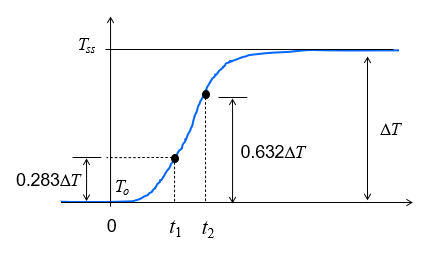

Calcule e apresente os valores obtidos a partir da curva de temperatura de `S2` para a definição do modelo de primeira ordem com atraso, ou seja, forneça os valores de $T_0$, $T_{ss}$, $\Delta_T$, $K$, $\tau=3/2(t_2-t_1)$, $\tau_D=t_2-\tau$ e $SSE$.

In [59]:
# Coloque o código AQUI

# Para se obter T0, basta pegar no primeiro valor dos dados experimentais obtidos para S1.
T0_S2 = temperatura_S2[0]
print(f"Temperatura inicial = {T0_S2} °C")
# Para se obter Tss, basta pegar no último valor dos dados experimentais obtidos para S1, já que temos a certeza que o mesmo pertence á temperatura estabilizada.
Tss_S2 = temperatura_S2[len(temperatura_S2)-1]
print(f"Temperatura estabilizada = {Tss_S2} °C")
# Para se obter ΔT, basta subtrair a temperatura estabilizada pela temperatura inicial.
ΔT_S2 = Tss_S2 - T0_S2
# Para se obter K, usamos ΔT/Δu (diferença entre a temperatura estabilizada e a temperatura inicial dividido por  variação do sinal de entrada).
Δu_S2 = 50
K_S2 = ΔT_S2/Δu_S2
print(f"K = {K_S2}")

# Para se obter τ (tau)
# Temperaturas correspondentes a 28.3% e 63.2% de ΔT
T_283 = 0.283 * ΔT_S2 + T0_S2
T_632 = 0.632 * ΔT_S2 + T0_S2

# Interpolação para encontrar t1 e t2
f_interp = interp1d(temperatura_S2, tempo_S2)

# Encontrar os tempos correspondentes a essas temperaturas
t1 = f_interp(T_283)
t2 = f_interp(T_632)

print(f"t1 = {t1} s")
print(f"t2 = {t2} s")
# Calcular o valor de τ
τ_S2 = (3/2) * (t2 - t1)
print(f"τ = {τ_S2} s")

# Caucular τ_d 
τ_d_S2 = t2 - τ_S2
print(f"τd = {τ_d_S2}")


def modelo_primeira_ordem_com_atraso(t, T0, K, τ, τ_d):
    # Modelo: y(t) = T0 + K * (1 - exp(-(t - Td) / tau)) para t >= Td
    valor = np.where(t <= τ_d, T0, T0 + K * 50 * (1 - np.exp(-(t - τ_d) / τ)))   
    return valor

y_modelo_S2 = modelo_primeira_ordem_com_atraso(tempo_S2, T0_S2, K_S2, τ_S2, τ_d_S2)

# Calcular o SSE
SSE_S2 = np.sum((y_modelo_S2 - temperatura_S2)**2)
print(f"SSE = {SSE_S2}")


Temperatura inicial = 27.2 °C
Temperatura estabilizada = 53.15 °C
K = 0.519
t1 = 56.987700000000004 s
t2 = 138.5008 s
τ = 122.26964999999998 s
τd = 16.231150000000014
SSE = 189.29917967572302
mse= 0.23343265402073346


Com base nos parâmetros identificados, apresente a função de transferência do modelo estimado do sistema térmico, $G(s)$.

In [49]:
def G_s (K_S1, tempo_S1, τ, τd):
    return (K_S1*np.exp(-(τd*tempo_S1))/((τ*tempo_S1)+1))

Ganho = G_s(K_S2, tempo_S2, τ_S2, τ_d_S2)

print(Ganho)


[5.19000000e-001 3.76021186e-010 1.68596512e-017 1.00519062e-024
 6.73761358e-032 4.81586692e-039 3.58519326e-046 2.74505699e-053
 2.14547716e-060 1.70342015e-067 1.36931965e-074 1.11184831e-081
 9.10300936e-089 7.50493192e-096 6.22418794e-103 5.18844837e-110
 4.34434881e-117 3.65182469e-124 3.08034287e-131 2.60633037e-138
 2.21138079e-145 1.88097840e-152 1.60357482e-159 1.36991055e-166
 1.17250946e-173 1.00529756e-180 8.63312185e-188 7.42478073e-195
 6.39433202e-202 5.51392315e-209 4.76039131e-216 4.11440608e-223
 3.55978336e-230 3.08293302e-237 2.67241190e-244 2.31856019e-251
 2.01320433e-258 1.74941328e-265 1.52129764e-272 1.32384365e-279
 1.15277543e-286 1.00444030e-293 8.75713166e-301 7.63916341e-308
 6.66752383e-315 5.82997462e-322 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.000000

Para se obter uma melhor perceção de quão bem o modelo derivado se adapta aos dados da curva de temperatura, esboce no mesmo gráfico as duas curvas de temperatura: a do modelo e a do sistema térmico. Teça alguns comentários face à aproximação obtida.

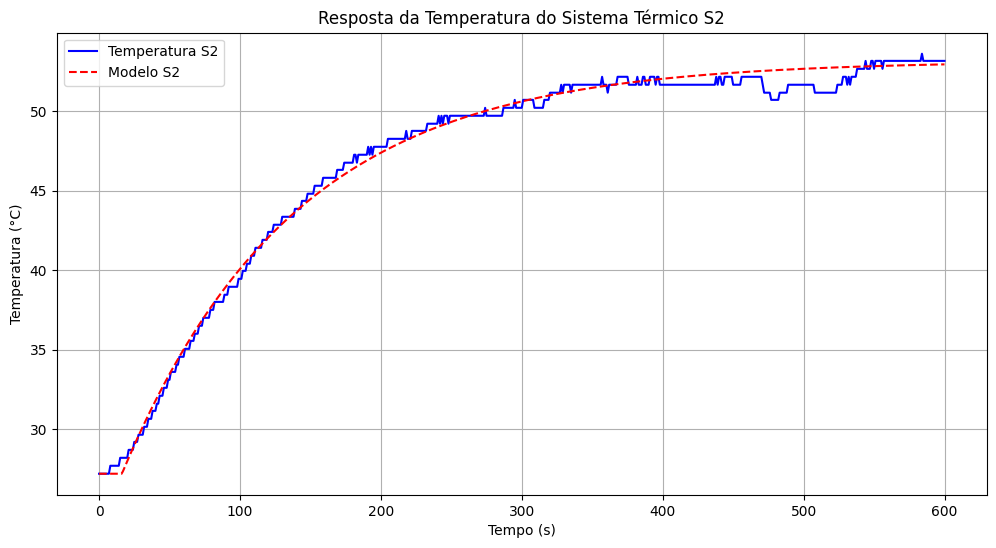

In [50]:
# Coloque o código/comentários AQUI

plt.figure(figsize=(12, 6))
plt.plot(tempo_S2, temperatura_S2, '-',label='Temperatura S2', color='b')
plt.plot(tempo_S2, y_modelo_S2, '--',label='Modelo S2', color='r')
plt.title('Resposta da Temperatura do Sistema Térmico S2')
plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (°C)')
plt.grid()
plt.legend()
plt.show()


### 3.3	Sistemas de Primeira Ordem – Otimização
Obtenha os parâmetros dos modelos de primeira ordem representados pelas funções de transferência (2) e (3) usando um método de otimização.


### Sistema S1
Defina a função da resposta do modelo, utilize um método de optimização, e apresente os valores óptimos dos parâmetros do modelo. Visualize os resultados num gráfico com as duas curvas: a do modelo e a dos dados de processo experimentais. Comente os resultados obtidos.

In [51]:
# Coloque o código/comentários AQUI

from scipy.optimize import curve_fit
p0=[T0_S1, K_S1, 1/τ_S1]
c, cov = curve_fit(modelo_primeira_ordem, tempo_S1, temperatura_S1, p0)


print(f"c1= {c[0]:0.4f}")
print(f"c2= {c[1]:0.4f}")
print(f"c3= {c[2]:0.4f}")

c1= 26.5463
c2= 29.8686
c3= 0.0090


Faça uma comparação com o modelo estimado no ponto 3.1. Para isso, apresente na mesma figura as duas curvas: a do modelo optimizado e a do modelo empírico, juntamente com os dados do processo. Comente as aproximações obtidas.

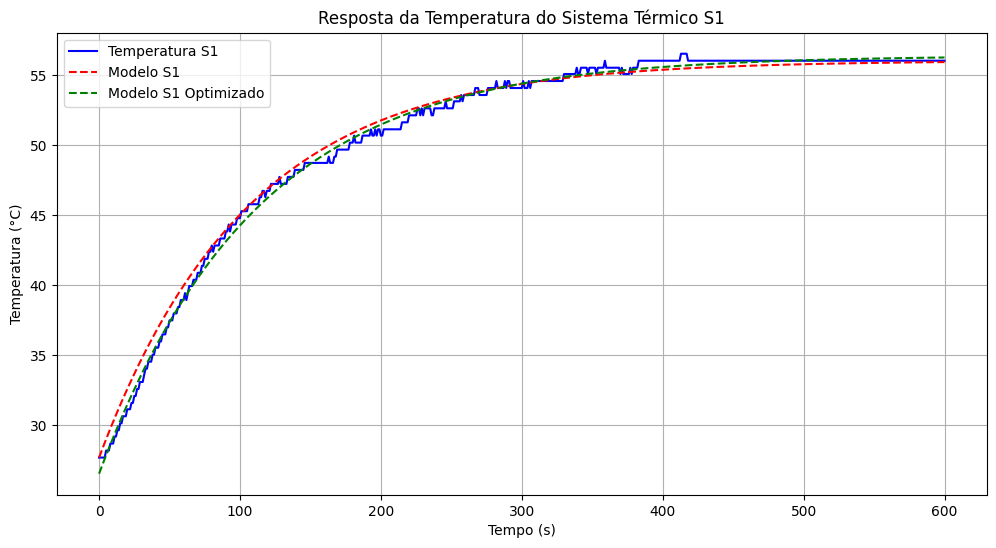

In [52]:
# Coloque o código/comentários AQUI
#Faça uma comparação com o modelo estimado no ponto 3.1. Para isso, apresente na mesma figura as duas curvas: a do modelo optimizado e a do modelo empírico, juntamente com os dados do processo. Comente as aproximações obtidas.

y_modelo_S1_optimizado = modelo_primeira_ordem(tempo_S1, c[0], c[1], c[2])

plt.figure(figsize=(12, 6))
plt.plot(tempo_S1, temperatura_S1, '-',label='Temperatura S1', color='b')
plt.plot(tempo_S1, y_modelo_S1, '--',label='Modelo S1', color='r')
plt.plot(tempo_S1, y_modelo_S1_optimizado, '--',label='Modelo S1 Optimizado', color='g')
plt.title('Resposta da Temperatura do Sistema Térmico S1')
plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (°C)')
plt.grid()
plt.legend()
plt.show()

#O Modelo Otimizado efetivamente aproximou o modelo da resposta do sistema térmico reduzindo o Valor de SSE de 228 para 80 (-68%)

Para efeitos de comparação entre os dois modelos, o empírico e o optimizado, utilize a métrica de desempenho $MAE$ (*Mean Absolute Error*):

$$ MAE = \frac{1}{N}\sum_{i=1}^{N}|\hat{y}_i-yi| $$

onde $\hat{y}_i$ é a resposta do modelo e $y_i$ a resposta do processo. $N$ é o número de amostras das respostas. 

Comente os resultados obtidos.

In [57]:
# Coloque o código/comentários AQUI
from sklearn.metrics import mean_absolute_error
# vamos comparar o modelo empírico com o modelo optimizado usando o MAE (Mean Absolute Error)

mae_empirico = mean_absolute_error(temperatura_S1, y_modelo_S1)
mae_optimizado = mean_absolute_error(temperatura_S1, y_modelo_S1_optimizado)

print(f"MAE do modelo empírico = {mae_empirico}")
print(f"MAE do modelo optimizado = {mae_optimizado}")

print(f"O modelo optimizado apresenta um MAE inferior ao modelo empírico, o que significa que o modelo optimizado é mais preciso na previsão da temperatura.")


SSE_S1_O = np.sum((y_modelo_S1_optimizado - temperatura_S1)**2)
print(f"SSE = {SSE_S1_O}")

MAE do modelo empírico = 0.47852982359384816
MAE do modelo optimizado = 0.28917075017490257
O modelo optimizado apresenta um MAE inferior ao modelo empírico, o que significa que o modelo optimizado é mais preciso na previsão da temperatura.
SSE = 80.09879214787823


### Sistema S2
Defina a função da resposta do modelo, utilize um método de optimização, e apresente os valores óptimos do parâmetros do modelo. Visualize os resultados num gráfico com as duas curvas: a do modelo e a dos dados de processo experimentais. Comente os resultados obtidos.

In [54]:
# Coloque o códi
from scipy.optimize import curve_fit
p0=[T0_S2, K_S2, τ_S2, τ_d_S2]
c, cov = curve_fit(modelo_primeira_ordem_com_atraso, tempo_S2, temperatura_S2, p0)


print(f"c1= {c[0]:0.4f}")
print(f"c2= {c[1]:0.4f}")
print(f"c3= {c[2]:0.4f}")#/comentários AQUI



c1= 27.7435
c2= 0.4970
c3= 111.3293


Faça uma comparação com o modelo estimado no ponto 3.2. Para isso, apresente na mesma figura as duas curvas: a do modelo optimizado e a do modelo empírico, juntamente com os dados do processo. Comente as aproximações obtidas. 

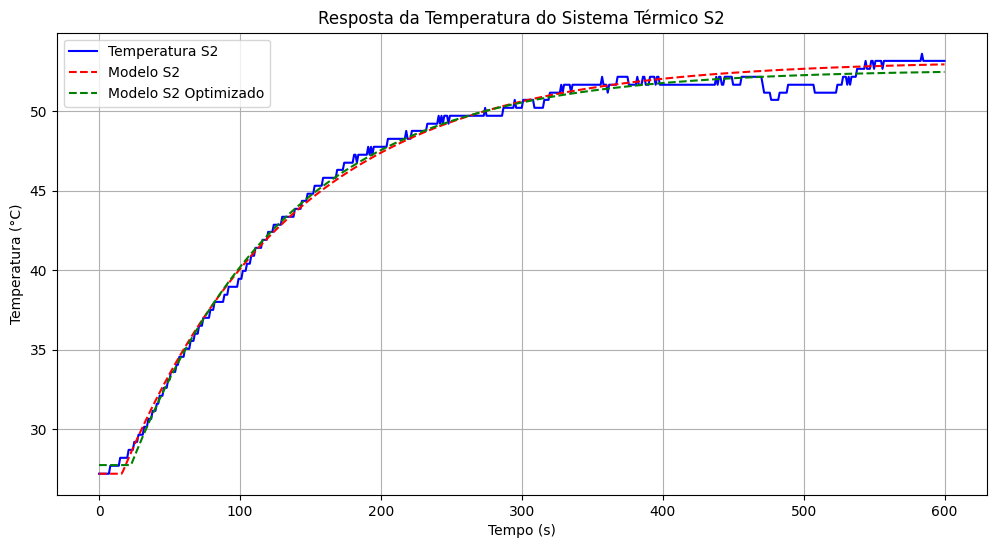

In [55]:
y_modelo_S2_optimizado = modelo_primeira_ordem_com_atraso(tempo_S2, c[0], c[1], c[2], c[3])

plt.figure(figsize=(12, 6))
plt.plot(tempo_S2, temperatura_S2, '-',label='Temperatura S2', color='b')
plt.plot(tempo_S2, y_modelo_S2, '--',label='Modelo S2', color='r')
plt.plot(tempo_S2, y_modelo_S2_optimizado, '--',label='Modelo S2 Optimizado', color='g')
plt.title('Resposta da Temperatura do Sistema Térmico S2')
plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (°C)')
plt.grid()
plt.legend()
plt.show()

##O Modelo Otimizado efetivamente aproximou o modelo da resposta do sistema térmico reduzindo o Valor de SSE de 189 para 140 (-26%)



Para efeitos de comparação entre os dois modelos, o empírico e o optimizado, utilize a métrica de desempenho $MSE$ (*Mean Squared Error*):

$$ MSE = \frac{1}{N}\sum_{i=1}^{N}(\hat{y}_i-yi)^2 $$

onde $\hat{y}_i$ é a resposta do modelo e $y_i$ a resposta do processo. $N$ é o número de amostras das respostas. 

Comente os resultados obtidos.

In [58]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(temperatura_S2,y_modelo_S2_optimizado)

print(f"mse= {mse}")

SSE_S2_O = np.sum((y_modelo_S2_optimizado - temperatura_S2)**2)
print(f"SSE = {SSE_S2_O}")



mse= 0.23343265402073346
SSE = 140.2930250664608
